In [1]:
### Homework ###
# Kütüphaneler 
import pandas as pd # pandas will be referred to as pd below
import numpy
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_Unmeploy = pd.read_csv('indicator_t-25-54-unemploy.csv')
data_Unmeploy.rename(columns={'Total 25-54 unemployment (%)' : 'country'}, inplace=True) 

In [3]:
##data_Unmeploy.head()

In [4]:
## Unemplyo datasının 1990 dan 2005 e kadar olan kolonları 
data_U = data_Unmeploy.iloc[:,0:26]
data_U.drop(['1981','1982','1983','1983','1984','1985','1986','1987','1988','1989'], axis=1, inplace = True)
data_U.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Australia,5.1,7.3,8.0,8.3,7.3,6.4,6.4,6.4,6.0,5.4,5.0,5.3,5.1,4.8,4.2,3.9
1,Canada,7.3,9.2,10.0,10.2,9.3,8.5,8.6,7.8,7.0,6.4,5.7,6.2,6.5,6.4,6.0,5.7
2,Czech Rep.,NaN,NaN,NaN,3.4,3.4,3.3,3.2,4.1,5.5,7.5,7.7,7.2,6.5,7.0,7.3,7.4
3,Estonia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.9,11.8,10.0,9.4,8.9,7.5
4,Finland,2.1,5.2,9.6,14.1,14.1,13.1,12.2,10.7,9.4,8.5,8.0,7.4,7.3,7.3,7.2,6.8


In [5]:
data_Unemploy = pd.melt(data_U, id_vars=['country'])
data_Unemploy.sort_values('country', inplace=True)
data_Unemploy.reset_index(inplace= True)
data_Unemploy = data_Unemploy.iloc[:464,1:]

In [6]:
data_Unemploy.shape #### 464,3

(464, 3)

In [7]:
#data_Unemploy.head()

In [8]:
data_Suicide = pd.read_csv('suicide_total_deaths.csv')

In [9]:
#data_Suicide.head()

In [10]:
data_S = data_Suicide.iloc[:,:17]
data_S.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
0,Afghanistan,703.00,754.00,820.00,894.00,977.00,1050.00,1100.00,1130.00,1170.00,1200.0,1250.00,1300.00,1360.00,1450.00,1530.00,1600.00
1,Albania,127.00,130.00,131.00,135.00,136.00,142.00,150.00,162.00,170.00,175.0,175.00,184.00,191.00,196.00,201.00,204.00
2,Algeria,806.00,822.00,843.00,866.00,888.00,912.00,941.00,983.00,1020.00,1060.0,1080.00,1110.00,1140.00,1170.00,1190.00,1210.00
3,Andorra,5.45,5.82,6.18,6.33,6.36,6.17,6.04,6.28,6.24,6.2,6.19,6.14,6.09,6.34,6.84,7.04
4,Angola,645.00,653.00,667.00,700.00,735.00,756.00,738.00,738.00,816.00,809.0,819.00,842.00,863.00,916.00,957.00,980.00


In [11]:
data_Suicide = pd.melt(data_S, id_vars=['country'])
data_Suicide.head()

,country,variable,value
0,Afghanistan,1990,703.00
1,Albania,1990,127.00
2,Algeria,1990,806.00
3,Andorra,1990,5.45
4,Angola,1990,645.00


In [12]:
# Remove missing values: 
# dropna():dropped DataFrame
### data_Unemploy
print('Unemploy original length: '+ str(len(data_Unemploy)))
data_Unemploy_NoMissing= data_Unemploy.dropna() 
print('Unemploy new length: '+ str(len(data_Unemploy_NoMissing)))

print('-------------------------------------------------------------------------------------------------')

print('Suicide original length: '+ str(len(data_Suicide)))
data_Suicide_NoMissing= data_Suicide.dropna() 
print('Suicide new length: '+ str(len(data_Suicide_NoMissing)))


Unemploy original length: 464
Unemploy new length: 402
-------------------------------------------------------------------------------------------------
Suicide original length: 2992
Suicide new length: 2992


In [13]:
data_Suicide_NoMissing.rename(columns={'variable' : 'year', 'value':'Suicide'}, inplace=True) 
#data_Suicide_NoMissing.head()

In [14]:
data_Unemploy_NoMissing.rename(columns={'variable' : 'year', 'value':'Unemploy'}, inplace=True) 
#data_Unemploy_NoMissing.head()

In [15]:
df = pd.merge(data_Unemploy_NoMissing, data_Suicide_NoMissing, on=['country', 'year'] )

In [16]:
print('Unemploy original length: '+ str(len(df)))
df_NoMissing= df.dropna() 

print('Unemploy new length: '+ str(len(df_NoMissing)))

### Nan değer yok kontrol amaçlı

Unemploy original length: 359
Unemploy new length: 359


In [17]:
#df.head()

In [18]:
### Converts to numeric :lets python recognize these columns as numeric so that some numeric operations can be done
df['year']= pd.to_numeric(df['year'])
df['Unemploy']= pd.to_numeric(df['Unemploy'])
df['Suicide']= pd.to_numeric(df['Suicide'])

In [19]:
df.sort_values(['country','year'], inplace=True)
#df.head()

In [20]:
df.set_index('country',inplace=True)
df.reset_index(inplace=True)
df.head()

,country,year,Unemploy,Suicide
0,Australia,1990,5.1,2360.0
1,Australia,1991,7.3,2380.0
2,Australia,1992,8.0,2390.0
3,Australia,1993,8.3,2380.0
4,Australia,1994,7.3,2440.0


In [21]:
countCountry= df['country'].value_counts(sort= True, ascending=False, dropna=False) # sort= True
print(len(countCountry))
#countCountry.head()

26


In [22]:
print ('Year ranges from '+ str(df['year'].min())+' and to '+ str(df['year'].max()) )
countYear= df['year'].value_counts(sort= False, dropna=False)
print(countYear.head(5))
perYear= df['year'].value_counts(sort= False, dropna=False, normalize=True)
print(perYear.head(5))
print ('Number of Different Years: '+ str(len(countYear)))

Year ranges from 1990 and to 2005
1990    16
1991    18
1992    18
1993    20
1994    21
Name: year, dtype: int64
1990    0.044568
1991    0.050139
1992    0.050139
1993    0.055710
1994    0.058496
Name: year, dtype: float64
Number of Different Years: 16


In [23]:
countUnemploy= df['Unemploy'].value_counts(sort= False, dropna=False) 
# dropna=False  required, otherwise python does not show mising values

print(countUnemploy.head(5))
perUnemploy= df['Unemploy'].value_counts(sort= False, dropna=False, normalize=True)
print(perUnemploy.head(5))
print ('Number of Different Unemploy values: '+ str(len(countUnemploy)))

8.0     4
6.0     5
5.0     3
10.0    4
8.5     2
Name: Unemploy, dtype: int64
8.0     0.011142
6.0     0.013928
5.0     0.008357
10.0    0.011142
8.5     0.005571
Name: Unemploy, dtype: float64
Number of Different Unemploy values: 129


In [24]:
countSuicide= df['Suicide'].value_counts(sort= False, dropna=False)
print(countSuicide.head(5))
perSuicide= df['Suicide'].value_counts(sort= False, dropna=False, normalize=True)
print(perSuicide.head(5))
print ('Number of Different Suicide rates: '+ str(len(countSuicide)))

2360.0    1
2560.0    2
2520.0    1
2480.0    1
4240.0    4
Name: Suicide, dtype: int64
2360.0    0.002786
2560.0    0.005571
2520.0    0.002786
2480.0    0.002786
4240.0    0.011142
Name: Suicide, dtype: float64
Number of Different Suicide rates: 278


In [25]:
df.rename(index=str, columns={"country": "Country", "year": "Year", "Unemploy":"Aged_25-54_Unemployment_Rate_(%)", "Suicide":"Suicide_Total_Deaths" } , inplace=True)
df.head()

,Country,Year,Aged_25-54_Unemployment_Rate_(%),Suicide_Total_Deaths
0,Australia,1990,5.1,2360.0
1,Australia,1991,7.3,2380.0
2,Australia,1992,8.0,2390.0
3,Australia,1993,8.3,2380.0
4,Australia,1994,7.3,2440.0


In [26]:
###   Part 1
# Now, Create GDP groups, describe and visualize data:

print ('Suicide Total Deaths ranges from '+ str(df['Suicide_Total_Deaths'].min())+' and to '+ str(df['Suicide_Total_Deaths'].max()) )
df['Suicide_Total_Deaths'].describe()

Suicide Total Deaths ranges from 367.0 and to 39000.0


count      359.000000
mean      5817.933148
std       9125.517502
min        367.000000
25%        804.500000
50%       1970.000000
75%       4250.000000
max      39000.000000
Name: Suicide_Total_Deaths, dtype: float64

In [27]:
df['SuicideGruop'] = pd.cut(df["Suicide_Total_Deaths"], [350,1000,2000,3500,5000,12000,20000,39000])
print(len(df))
print(len(df['SuicideGruop']))

359
359


In [28]:
df['SuicideGruop']= df['SuicideGruop'].astype('category')
df['SuicideGruop'].describe()

count             359
unique              7
top       (350, 1000]
freq               99
Name: SuicideGruop, dtype: object

In [29]:
SuicideGruopP= df['SuicideGruop'].value_counts(sort= False, normalize= True)
print(SuicideGruopP)

(350, 1000]       0.275766
(1000, 2000]      0.228412
(2000, 3500]      0.142061
(3500, 5000]      0.111421
(5000, 12000]     0.066852
(12000, 20000]    0.086351
(20000, 39000]    0.089136
Name: SuicideGruop, dtype: float64


Univariate (related to only 1 variable) bar graph for categorical SuicideGruop varaible:

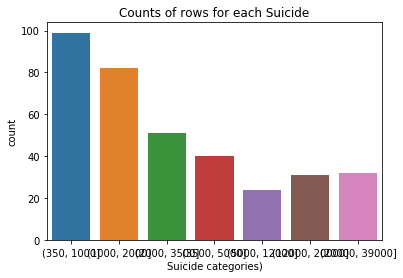

In [31]:
seaborn.countplot(x= 'SuicideGruop', data= df)
### Raporlamadan önce bak
plt.xlabel('Suicide categories)')
plt.title('Counts of rows for each Suicide')
plt.show()

In [32]:
df.head()

,Country,Year,Aged_25-54_Unemployment_Rate_(%),Suicide_Total_Deaths,SuicideGruop
0,Australia,1990,5.1,2360.0,"(2000, 3500]"
1,Australia,1991,7.3,2380.0,"(2000, 3500]"
2,Australia,1992,8.0,2390.0,"(2000, 3500]"
3,Australia,1993,8.3,2380.0,"(2000, 3500]"
4,Australia,1994,7.3,2440.0,"(2000, 3500]"


Text(0.5,1,'Counts of rows for each Suicide Total Deaths')

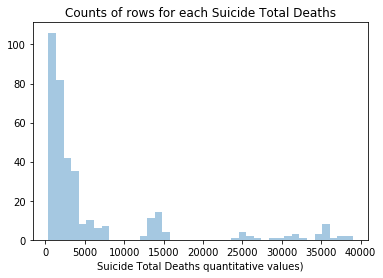

In [33]:
seaborn.distplot(df['Suicide_Total_Deaths'].dropna(), kde= False)
plt.xlabel('Suicide Total Deaths quantitative values)')
plt.title('Counts of rows for each Suicide Total Deaths')

In [ ]:
# Create Under_five_mortality groups, describe and visualize:

In [34]:
print ('Aged 25-54 Unemployment Rate(%) ranges from '+ str(df['Aged_25-54_Unemployment_Rate_(%)'].min())+' and to '+ 
       str(df['Aged_25-54_Unemployment_Rate_(%)'].max()) )
df['Aged_25-54_Unemployment_Rate_(%)'].describe()

Aged 25-54 Unemployment Rate(%) ranges from 1.2999999523163 and to 20.89999961853


count    359.000000
mean       7.040111
std        3.896712
min        1.300000
25%        4.250000
50%        6.100000
75%        8.950000
max       20.900000
Name: Aged_25-54_Unemployment_Rate_(%), dtype: float64

In [45]:
df.head()

,Country,Year,Aged_25-54_Unemployment_Rate_(%),Suicide_Total_Deaths,SuicideGruop,Unemployment_Group
0,Australia,1990,5.1,2360.0,"(2000, 3500]","(5, 9]"
1,Australia,1991,7.3,2380.0,"(2000, 3500]","(5, 9]"
2,Australia,1992,8.0,2390.0,"(2000, 3500]","(5, 9]"
3,Australia,1993,8.3,2380.0,"(2000, 3500]","(5, 9]"
4,Australia,1994,7.3,2440.0,"(2000, 3500]","(5, 9]"


In [44]:
df['Unemployment_Group'] = pd.cut(df.Unemployment , [1,3,5,9,10,14,17,20])
df['Unemployment_Group']= pd.cut(df.Unemployment, [2,50,100,200,500,800]) 

AttributeError: 'DataFrame' object has no attribute 'Unemployment'

In [37]:
df.head()

,Country,Year,Aged_25-54_Unemployment_Rate_(%),Suicide_Total_Deaths,SuicideGruop,Unemployment_Group
0,Australia,1990,5.1,2360.0,"(2000, 3500]","(5, 9]"
1,Australia,1991,7.3,2380.0,"(2000, 3500]","(5, 9]"
2,Australia,1992,8.0,2390.0,"(2000, 3500]","(5, 9]"
3,Australia,1993,8.3,2380.0,"(2000, 3500]","(5, 9]"
4,Australia,1994,7.3,2440.0,"(2000, 3500]","(5, 9]"


In [40]:
df['Unemployment_Group']= df.Unemployment_Group.astype('category')
df['Unemployment_Group)'].describe()


KeyError: 'Unemployment_Group)'

In [ ]:
Unemployment= df['Aged_25-54_Unemployment_Rate_(%)'].value_counts(sort= False, normalize= True)
print(Unemployment)

In [ ]:
seaborn.countplot(x= 'Aged_25-54_Unemployment_Rate_(%)', data= df)
plt.xlabel('Aged 25-54 Unemployment Rate (%) group')
plt.title('Counts of rows for each Rate')
plt.show()

In [ ]:
df

In [ ]:
seaborn.regplot(x= "Aged_25-54_Unemployment_Rate_(%)", y= "Suicide_Total_Deaths", fit_reg= False, data= df)